# Задача 4
Написать код к модели. Агентов взять из исходного диплома С.Коткина.
Провести эксперименты.

Эксперимент №1: при инициализации изменяем цену j-го магазина и смотрим, как меняется средняя прибыль этого магазина за T периодов. Построить график.

Эксперимент №2: берем несколько местоположений для нового магазина (см. ниже). Считаем среднюю прибыль нового магазина за T периодов. Делаем вывод, какое место самое удачное.

Пишем свой код. Если используется чужой код, то провести (обязательно!) какие-то интересные свои эксперименты.

* Данные по домам coords_houses.txt

* Данные по  магазинам shops.txt

* Координаты новых магазинов new_shop.txt

* Диплом 158581-Коткин.pdf

* Код code.zip

* 1 градус долготы 64км

* 1 градус широты 111.7км

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Входные данные

In [2]:
data = {
    'дом': ['Морской проспект 29', 
            'Золотодолинская 35', 
            'Жемчужная 10', 
            'Цветной проезд 25', 
            'Пирогова 14', 
            'Терешковой 4', 
            'Терешковой 5', 
            'Терешковой 24', 
            'Академическая 19', 
            'Академическая 8', 
            'Весенний пр-д, 2/32', 
            'Цветной проезд, 7', 
            'Ильича, 11', 
            'Правды, 7а', 
            'Золотодолинская 23', 
            'Золотодолинская 7', 
            'Терешковой 8', 
            'Академика Коптюга проспект, 5', 
            'Морской проспект, 32', 'Детский проезд, 7', 
            'Морской проспект, 9', 'Терешковой, 33'],
    'широта': [54.834337, 54.830969, 54.835602, 
               54.839828, 54.847183, 54.841976, 
               54.843251, 54.841868, 54.837784, 
               54.835003, 54.838802, 54.837564, 
               54.839626, 54.839093, 54.834410, 
               54.837075, 54.841162, 54.844832, 
               54.837926, 54.840052, 54.839075, 
               54.837420],
    'долгота': [83.096963, 83.104293, 83.092879, 
                83.092427, 83.092155, 83.097675, 
                83.104897, 83.108978, 83.111287, 
                83.111004, 83.088646, 83.096273, 
                83.098109, 83.100507, 83.104907, 
                83.106454, 83.100090, 83.103337, 
                83.103564, 83.105238, 83.110259, 83.116503],
    'жильцов': [480, 50, 200, 350, 
                700, 400, 10, 160, 
                450, 500, 300, 400, 
                350, 280, 170, 300, 
                900, 850, 450, 300, 280, 1250]
}

shops_data = {
    'Магазин': ['Flora ОПТ', 'Клумба', 'Anna', 'Белый сад', 'Гран-при', 'Цветочная мастерская', 'Дон пион'],
    'широта': [54.840327, 54.840522, 54.839870, 54.839654, 54.837185, 54.838893, 54.831012],
    'долгота': [83.110730, 83.109432, 83.108101, 83.107318, 83.101823, 83.096541, 83.105287],
    'ассортимент': [91, 30, 114, 26, 50, 68, 34],
    'цена': [90, 140, 80, 250, 100, 130, 200]
}

df = pd.DataFrame(data)

shops_df = pd.DataFrame(shops_data)

In [3]:
new_shop_locations = [
    (54.838862,	83.088575),
(54.835195,	83.095801),
(54.835004,	83.105028),
(54.837092,	83.112345),
(54.836910,	83.097185),
(54.838112,	83.102244),
(54.841399,	83.095109),
(54.841079,	83.099047),
(54.843729,	83.101262),
(54.843216,	83.109304)
]

Параметры модели

In [4]:
eta = 1.5 
tau = 0.5 
alpha = 0.1 
beta = 4./52. 
bucket_size = 7
retail_price = 350

In [5]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Вычисляем расстояние между двумя точками, заданными координатами широты и долготы. 
    # Используется формула гаверсинусов с упрощением для небольших расстояний.
    return np.sqrt(((lat1 - lat2) * 111.7)**2 + ((lon1 - lon2) * 64)**2)

def get_attractiveness(shops_df, df):
    # Вычисляем привлекательность каждого магазина для каждого дома.
    # Создается DataFrame 'attractiveness' с индексами домов и столбцами магазинов.
    attractiveness = pd.DataFrame(index = df['дом'], columns=shops_df['Магазин'])

    for i, row_i in df.iterrows():
        # Цикл по каждому датасету магазинов
        for j, row_j in shops_df.iterrows():
            r_ij = calculate_distance(row_i['широта'], row_i['долгота'], \
                                      row_j['широта'], row_j['долгота'])
            # Вычисление привлекательности магазина j для дома i с использованием формулы,
            # учитывающей цену, ассортимент и расстояние.
            attractiveness.loc[row_i['дом'], row_j['Магазин']] = \
            np.exp(eta * (-np.log(row_j['цена'] * bucket_size + tau * r_ij) + \
                          alpha * np.log(row_j['ассортимент'])))
    return attractiveness

def get_probabilities(attractiveness):
    # Вычисляем вероятность того, что житель дома выберет конкретный магазин.
    # Вероятность пропорциональна привлекательности магазина, нормализованной по сумме привлекательностей всех магазинов для данного дома.
    return attractiveness.div(attractiveness.sum(axis=1), axis=0)

def get_chised_customers(shops_df, probabilities):
    # Моделируем выбор магазина жителями домов и возвращает количество покупателей в каждом магазине.
    num_customers = pd.Series(index=shops_df['Магазин'], dtype = int)

    for i, row_i in df.iterrows():
        choices = np.random.choice(shops_df['Магазин'], size=int(row_i['жильцов'] * beta), \
                                   p = probabilities.loc[row_i['дом']].values.astype(float))
        for shop in choices:
            if np.isnan(num_customers.loc[shop]):
              num_customers.loc[shop] = 0
            num_customers.loc[shop] += 1
    return num_customers

## Задача 4.1
Получить следующие параметры:

* Привлекательность магазинов для каждого дома

* Вероятности посещения магазинов для каждого дома

* Численное количество покупателей для каждого магазина

In [6]:
# Расчет привлекательности магазинов для каждого дома
attractiveness = get_attractiveness(shops_df, df)

# Расчет вероятностей посещения магазинов для каждого дома
probabilities = get_probabilities(attractiveness)

# Расчет вероятного количества покупателей для каждого магазина
num_customers = get_chised_customers(shops_df, probabilities)

### Результат

In [7]:
print("Привлекательность магазинов для каждого дома:")
attractiveness

Привлекательность магазинов для каждого дома:


Магазин,Flora ОПТ,Клумба,Anna,Белый сад,Гран-при,Цветочная мастерская,Дон пион
дом,,,,,,,
Морской проспект 29,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Золотодолинская 35,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Жемчужная 10,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Цветной проезд 25,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Пирогова 14,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Терешковой 4,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Терешковой 5,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032
Терешковой 24,0.000124,0.000054,0.000154,0.000022,0.000097,0.000069,0.000032
Академическая 19,0.000124,0.000054,0.000153,0.000022,0.000097,0.000069,0.000032


In [8]:
print("Вероятности посещения магазинов для каждого дома:")
probabilities

Вероятности посещения магазинов для каждого дома:


Магазин,Flora ОПТ,Клумба,Anna,Белый сад,Гран-при,Цветочная мастерская,Дон пион
дом,,,,,,,
Морской проспект 29,0.225032,0.098254,0.277764,0.040318,0.175777,0.124195,0.058661
Золотодолинская 35,0.225055,0.098261,0.277769,0.040321,0.175749,0.124158,0.058687
Жемчужная 10,0.225022,0.098257,0.27775,0.040321,0.175772,0.124219,0.05866
Цветной проезд 25,0.225033,0.098259,0.277765,0.04032,0.175749,0.124228,0.058646
Пирогова 14,0.22506,0.098281,0.277765,0.040331,0.175707,0.124209,0.058648
Терешковой 4,0.225066,0.098261,0.277811,0.040315,0.175723,0.124193,0.058631
Терешковой 5,0.225124,0.09827,0.277867,0.040313,0.175672,0.124133,0.05862
Терешковой 24,0.225165,0.098274,0.277895,0.040309,0.175645,0.124098,0.058614
Академическая 19,0.225153,0.098265,0.277878,0.04031,0.175669,0.124095,0.058629


In [9]:
print("Численное количество покупателей для каждого магазина:")
num_customers

Численное количество покупателей для каждого магазина:


Магазин
Flora ОПТ               146.0
Клумба                   71.0
Anna                    194.0
Белый сад                20.0
Гран-при                131.0
Цветочная мастерская     81.0
Дон пион                 48.0
dtype: float64

## Задача 4.2

Эксперимент №1: при инициализации изменяем цену j-го магазина и смотрим, как меняется средняя прибыль этого магазина за T периодов. Построить график.

In [10]:
# Создаем список для хранения прибыли и цен
profits = []
prices = []
customers = []
shop_id = 1 # Будем следить за 2-ым магазином
real_price = shops_df.loc[shop_id, 'цена']
# Цикл по периодам
for period in range(-13, 16, 1):
    # Цена будет меняться от исходной цены в 140 рублей за цветок от 10 до 300 рублей
    shops_df.loc[shop_id, 'цена'] += period * 10  

    # Расчет привлекательности магазинов для каждого дома
    attractiveness = get_attractiveness(shops_df, df)

    # Расчет вероятностей посещения магазинов для каждого дома
    probabilities = get_probabilities(attractiveness)

    # Расчет численного количества покупателей для каждого магазина
    num_customers = get_chised_customers(shops_df, probabilities)

    # Расчет прибыли для первого магазина
    profit = num_customers.iloc[shop_id] * (shops_df.loc[shop_id, 'цена'] * bucket_size - retail_price)

    # Установка значений в наши хранилища
    profits.append(profit)
    prices.append(shops_df.loc[shop_id, 'цена'])
    customers.append(num_customers.iloc[shop_id])

    # Возвращаем реальную цену на место
    shops_df.loc[shop_id, 'цена'] = real_price

### Результат

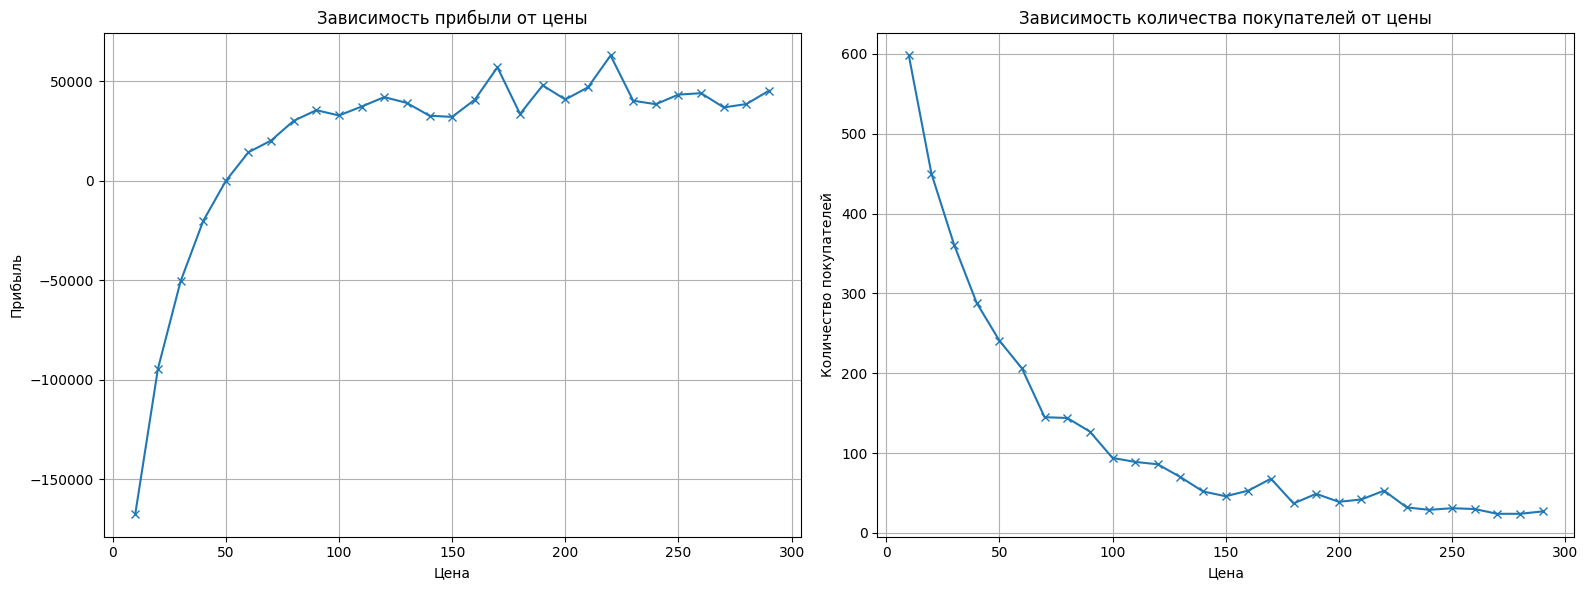

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График прибыли от цены
ax1.plot(prices, profits, marker='x')
ax1.set_xlabel('Цена')
ax1.set_ylabel('Прибыль')
ax1.set_title('Зависимость прибыли от цены')
ax1.grid()

# График количества покупателей от цены
ax2.plot(prices, customers, marker='x')
ax2.set_xlabel('Цена')
ax2.set_ylabel('Количество покупателей')
ax2.set_title('Зависимость количества покупателей от цены')
ax2.grid()

plt.tight_layout()
plt.show()

Уберём цены ниже  рентабильной

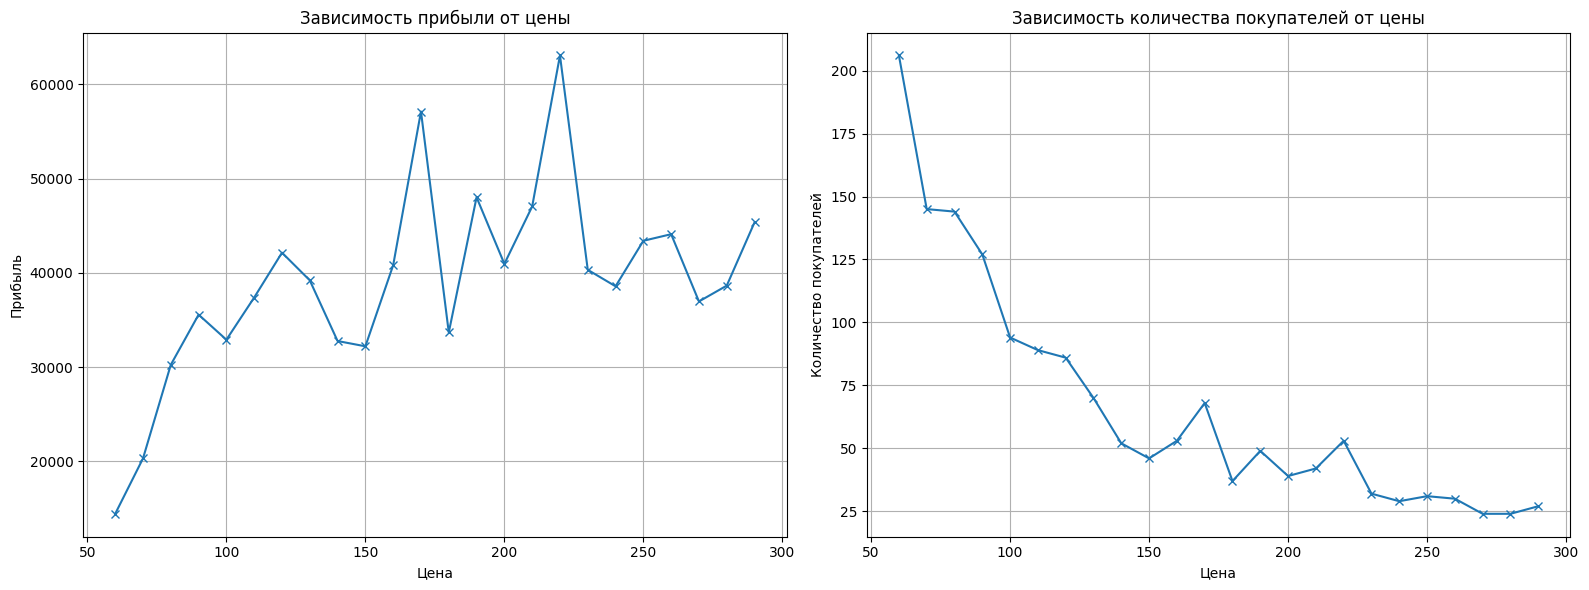

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Индексы рентабельных данных
indecies = [i for i, x in enumerate(prices) if x > retail_price / bucket_size]

# График прибыли от цены
ax1.plot([prices[i] for i in indecies], [profits[i] for i in indecies], marker='x')
ax1.set_xlabel('Цена')
ax1.set_ylabel('Прибыль')
ax1.set_title('Зависимость прибыли от цены')
ax1.grid()

# График количества покупателей от цены
ax2.plot([prices[i] for i in indecies], [customers[i] for i in indecies], marker='x')
ax2.set_xlabel('Цена')
ax2.set_ylabel('Количество покупателей')
ax2.set_title('Зависимость количества покупателей от цены')
ax2.grid()

plt.tight_layout()
plt.show()

## Задача 4.3

Эксперимент №2: берем несколько местоположений для нового магазина (см. ниже). Считаем среднюю прибыль нового магазина за T периодов. Делаем вывод, какое место самое удачное.

In [13]:

shop_collection = []
# Цикл по новым расположениям магазинов
for lat, lon in new_shop_locations:
  profits = []
  prices = []
  customers = []
  for period in range(-13, 16, 1):
    changed_shops_df = shops_df.copy()
    # Добавляем новый магазин
    changed_shops_df = pd.concat([changed_shops_df, pd.DataFrame({
            'Магазин': [f'{lat}-{lon}'],
            'широта': [lat],
            'долгота': [lon],
            'ассортимент': [100.],
            # Цена будет меняться от исходной цены в 140 рублей за цветок от 10 до 300 рублей
            'цена': [140.0 + period * 10.0]
        })], ignore_index = True)
    
    # Расчет привлекательности магазинов для каждого дома
    attractiveness = get_attractiveness(changed_shops_df, df)

    # Расчет вероятностей посещения магазинов для каждого дома
    probabilities = get_probabilities(attractiveness)

    # Расчет численного количества покупателей для каждого магазина
    num_customers = get_chised_customers(changed_shops_df, probabilities)

    last_index = len(shops_df)
    # Расчет прибыли для расчётного магазина
    profit = num_customers.iloc[last_index] * (changed_shops_df.loc[last_index, 'цена'] * bucket_size - retail_price)
    profits.append(profit)
    prices.append(changed_shops_df.loc[last_index, 'цена'])
    customers.append(num_customers.iloc[last_index])

  shop_collection.append([profits, prices, customers])

In [14]:
def find_most_profitable_locations(shop_collection, new_shop_locations):
    num_shops = len(shop_collection)
    num_prices = len(shop_collection[0][0])
    
    # Вычисляем прибыль для каждого магазина при каждой цене
    profits = []
    for i in range(num_shops):
        shop_profits = []
        for j in range(num_prices):
            profit = shop_collection[i][0][j]
            shop_profits.append(profit)
        profits.append(shop_profits)
    
    # Находим самое прибыльное место для каждой цены
    most_profitable_locations_per_price = []
    most_profitable_profits_per_price = []
    for j in range(num_prices):
        max_profit = float('-inf')
        max_location = None
        for i in range(num_shops):
            if profits[i][j] > max_profit:
                max_profit = profits[i][j]
                max_location = new_shop_locations[i]
        most_profitable_locations_per_price.append(max_location)
        most_profitable_profits_per_price.append(max_profit)
    
    # Находим самое прибыльное место среди всех мест
    max_profit = float('-inf')
    max_location = None
    for i in range(num_shops):
        for j in range(num_prices):
            if profits[i][j] > max_profit:
                max_profit = profits[i][j]
                max_location = new_shop_locations[i]
    
    return most_profitable_locations_per_price, most_profitable_profits_per_price, max_location, max_profit

def find_max_index(arr):
    if len(arr) == 0:
        return None
    
    max_index = 0
    max_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] > max_value:
            max_value = arr[i]
            max_index = i
    
    return max_index

In [15]:
most_prof_loc = find_most_profitable_locations(shop_collection, new_shop_locations)
best_price_and_pos_index = find_max_index(most_prof_loc[1])
best_shop_index = new_shop_locations.index(most_prof_loc[0][best_price_and_pos_index])

In [16]:
changed_shops_df = shops_df.copy()
lat = most_prof_loc[0][best_price_and_pos_index][0]
lon = most_prof_loc[0][best_price_and_pos_index][1]
# Добавляем новый магазин в датафрейм shops_df
new_shop = pd.DataFrame({
        'Магазин': [f'{lat}-{lon}'],
        'широта': [lat],
        'долгота': [lon],
        'ассортимент': [100.],
        'цена': [shop_collection[best_shop_index][1][best_price_and_pos_index]]
    })
changed_shops_df = pd.concat([changed_shops_df, new_shop], ignore_index = True)

In [17]:
profits = []
prices = []
customers = []
# Расчет привлекательности магазинов для каждого дома
attractiveness = get_attractiveness(changed_shops_df, df)
# Расчет вероятностей посещения магазинов для каждого дома
probabilities = get_probabilities(attractiveness)
# Расчет численного количества покупателей для каждого магазина
num_customers = get_chised_customers(changed_shops_df, probabilities)
# Расчет прибыли для каждого магазина
for j, row_j in changed_shops_df.iterrows():
    profit = num_customers.loc[row_j['Магазин']] * (row_j['цена'] * bucket_size - retail_price)
    profits.append(profit)
    prices.append(row_j['цена'])
    customers.append(num_customers.loc[row_j['Магазин']])

### Результат

In [18]:
profits

[44240.0, 40950.0, 45570.0, 28000.0, 36750.0, 38080.0, 37800.0, 35420.0]

In [19]:
changed_shops_df['широта'].tolist()

[54.840327,
 54.840522,
 54.83987,
 54.839654,
 54.837185,
 54.838893,
 54.831012,
 54.837092]

In [20]:
changed_shops_df['долгота'].tolist()

[83.11073,
 83.109432,
 83.108101,
 83.107318,
 83.101823,
 83.096541,
 83.105287,
 83.112345]

In [21]:
x = changed_shops_df['широта'].tolist()
y = changed_shops_df['долгота'].tolist()
z = profits

x = np.round(np.array(x) * 1000).astype(int)
y = np.round(np.array(y) * 1000).astype(int)
# Создаем сетку для карты
x_grid, y_grid = np.meshgrid(x, y)

# Вычисляем значения z для каждой точки сетки
z_grid = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z_grid[i, j] = z[i] 


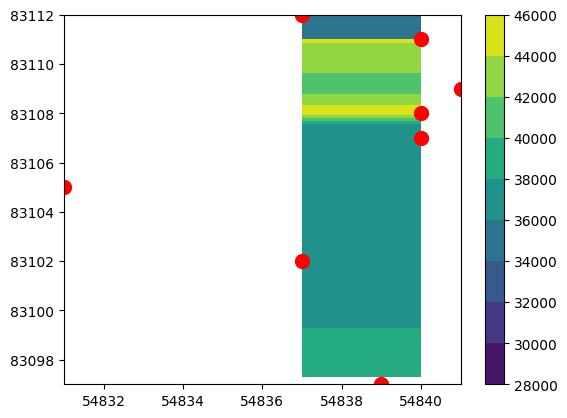

In [22]:
# Рисуем карту с линиями уровня
plt.contourf(x_grid, y_grid, z_grid, levels=10)
plt.colorbar()
plt.scatter(x, y, s=100, c='red')
plt.show()

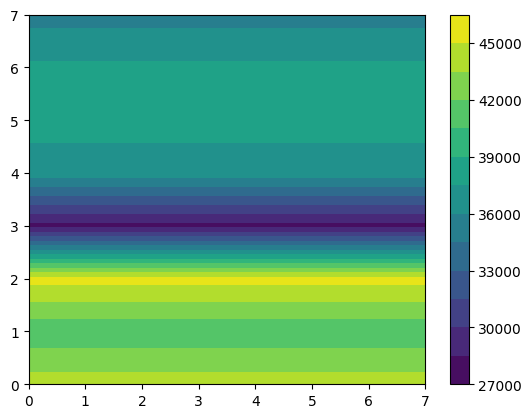

In [23]:
plt.contourf(z_grid, levels=15)
plt.colorbar()
plt.show()

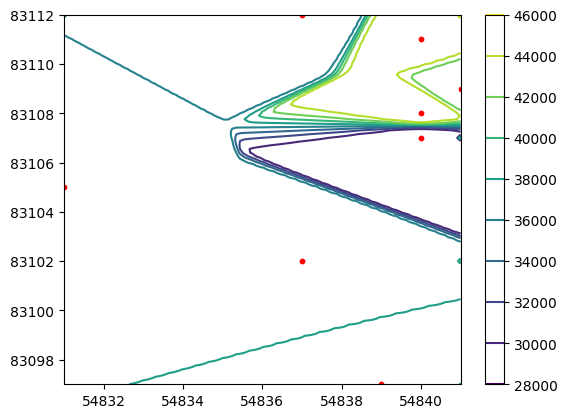

In [24]:
# Находим минимальное и максимальное значения в массивах x и y
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

# Создаем сетку для z
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

# Вычисляем значения z для каждой точки сетки
z_grid = np.zeros((len(x_grid), len(y_grid)))
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        # Проверяем, есть ли значение z для данной точки сетки
        if (x_grid[i, j] in x) and (y_grid[i, j] in y):
            # Если есть, то берем это значение
            z_grid[i, j] = z[np.where(x == x_grid[i, j])[0][0]]
        else:
            # Если нет, то экстраполируем с затухающей функцией
            distances = np.sqrt((x_grid[i, j] - x)**2 + (y_grid[i, j] - y)**2)
            weights = np.exp(-distances / 0.1)
            z_grid[i, j] = np.sum(z * weights) / np.sum(weights)

# Рисуем карту с изолиниями уровня
plt.contour(x_grid, y_grid, z_grid, levels=10)
plt.colorbar()
plt.scatter(x, y, s=10, c='red')
plt.show()

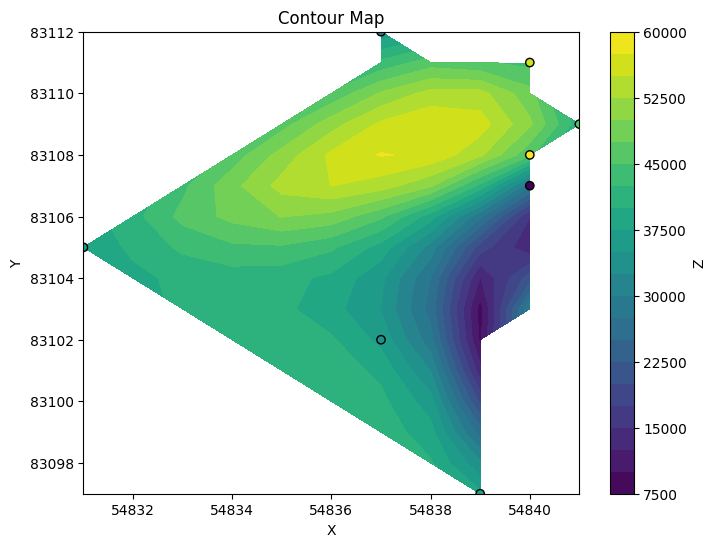

In [25]:
from scipy.interpolate import griddata
z = np.array(z)

# Нахождение минимальных и максимальных значений x и y
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# Создание сетки для z
xi, yi = np.meshgrid(np.arange(x_min, x_max+1), np.arange(y_min, y_max+1))

# Экстраполяция значений z с затухающей функцией
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение карты с изолиниями уровня
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.colorbar(label='Z')
plt.scatter(x, y, c=z, cmap='viridis', edgecolors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Map')
plt.show()

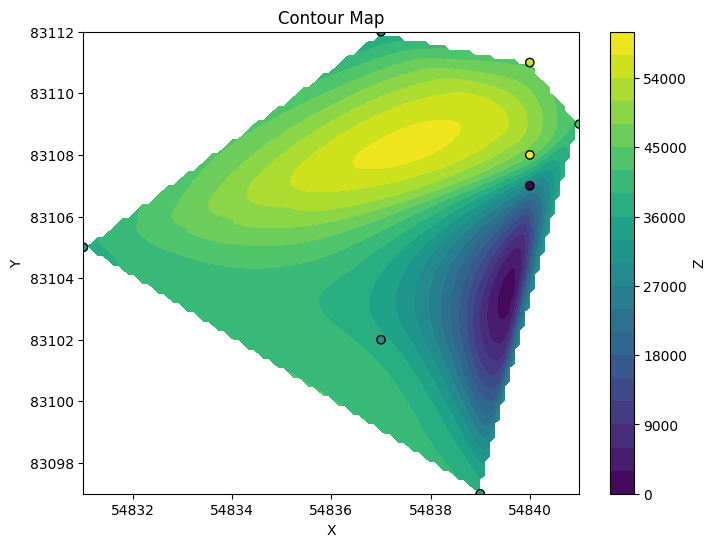

In [26]:
# Создание сетки для z на всем интервале x_min, x_max, y_min, y_max
xi = np.linspace(x_min, x_max, 100)
yi = np.linspace(y_min, y_max, 100)
xi, yi = np.meshgrid(xi, yi)

# Экстраполяция значений z с затухающей функцией
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Построение карты с изолиниями уровня
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.colorbar(label='Z')
plt.scatter(x, y, c=z, cmap='viridis', edgecolors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Map')
plt.show()

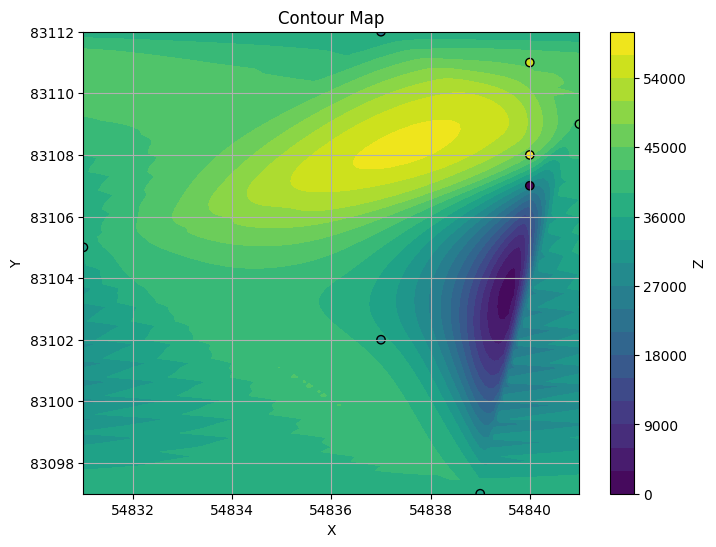

In [27]:
# Создание сетки для z на всем интервале x_min, x_max, y_min, y_max
xi = np.linspace(x_min, x_max, 100)
yi = np.linspace(y_min, y_max, 100)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция значений z методом 'nearest' или 'linear'
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Заполнение значений nan экстраполированными значениями
mask = np.isnan(zi)
zi[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), zi[~mask])

# Построение карты с изолиниями уровня
plt.figure(figsize=(8, 6))
plt.contourf(xi, yi, zi, levels=20, cmap='viridis')
plt.colorbar(label='Z')
plt.scatter(x, y, c=z, cmap='viridis', edgecolors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Map')
plt.grid(True)
plt.show()

c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


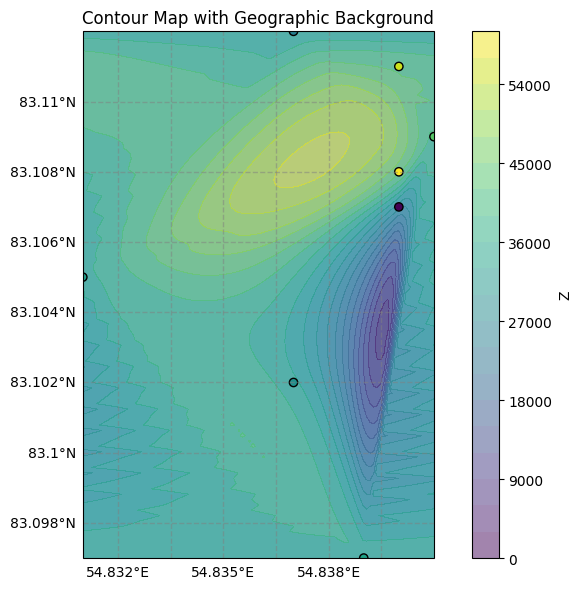

In [28]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Создание сетки для z на всем интервале x_min, x_max, y_min, y_max
xi = np.linspace(x_min, x_max, 100)
yi = np.linspace(y_min, y_max, 100)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция значений z методом 'nearest' или 'linear'
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Заполнение значений nan экстраполированными значениями
mask = np.isnan(zi)
zi[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), zi[~mask])

# Создание фигуры и осей с проекцией PlateCarree
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Установка границ карты
ax.set_extent([x_min/1000, x_max/1000, y_min/1000, y_max/1000], crs=ccrs.PlateCarree())

# Добавление географической подложки
ax.stock_img()

# Построение тепловой карты с прозрачностью 0.5
contour = ax.contourf(xi/1000, yi/1000, zi, levels=20, cmap='viridis', alpha=0.5, transform=ccrs.PlateCarree())

# Добавление точек данных
ax.scatter(x/1000, y/1000, c=z, cmap='viridis', edgecolors='black', transform=ccrs.PlateCarree())

# Добавление цветовой шкалы
cbar = plt.colorbar(contour, ax=ax, label='Z')

# Настройка меток осей
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Установка заголовка
ax.set_title('Contour Map with Geographic Background')

plt.tight_layout()
plt.show()